In [2]:
df =pd.read_csv('StudentsPerformance.csv')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn import *
%matplotlib inline

In [3]:
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [139]:
'''There is no null values in any variable, 
so by the moment no prior processing will take place.
'''
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [100]:
df["race/ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [101]:
df["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [102]:
df["lunch"].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [103]:
df["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [104]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [109]:
#Find the average score of each student and append the attribute to the dataframe
df.total_score=df["math score"]+df["reading score"]+df["writing score"]
df.avg_score=round(df.total_score)/3.0
df.avg_score
df['avg_score']=df.avg_score
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [58]:
corr = df.corr()
print(corr)

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


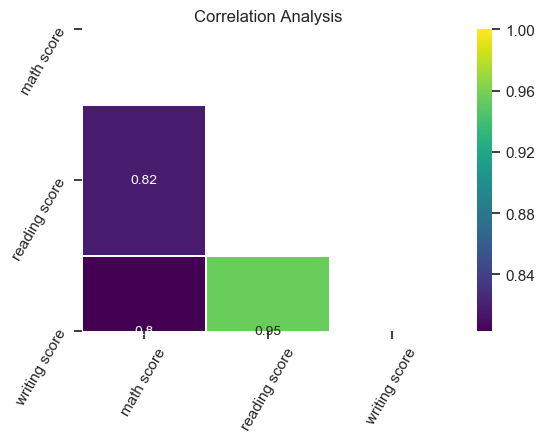

In [59]:
corr = df.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))
plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(df.corr(),mask=mask,annot=True,lw=1,linecolor='white',cmap='viridis')
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
plt.show()

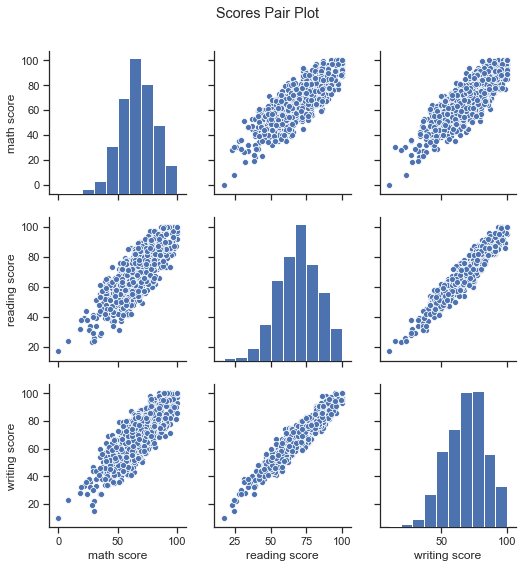

In [60]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, palette="coolwarm")
title = g.fig.suptitle("Scores Pair Plot", y = 1.05)

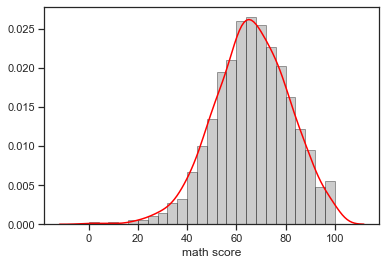

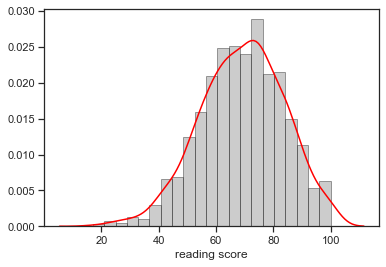

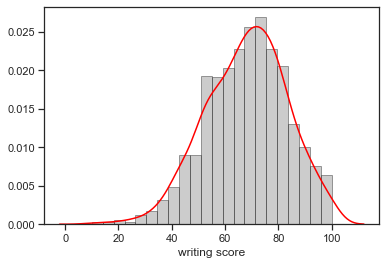

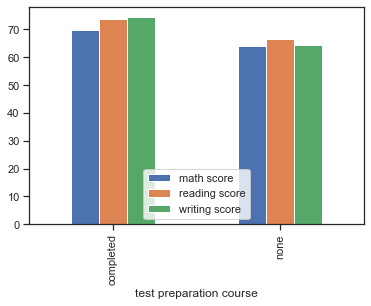

                         math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673


In [84]:
sns.distplot(df["math score"],hist_kws=dict(edgecolor="k", 
                linewidth=1,color='grey'),color='red')
plt.show()
sns.distplot(df["reading score"],hist_kws=dict(edgecolor="k",
                linewidth=1,color='grey'),color='red')
plt.show()
sns.distplot(df["writing score"],hist_kws=dict(edgecolor="k",
                linewidth=1,color='grey'),color='red')
plt.show()
df.groupby(["test preparation course"]).mean().plot.bar()
plt.show()
ple_vs_b = df.groupby(["test preparation course"]).mean()
print(ple_vs_b)

#Average score is more for kids who took preparation course


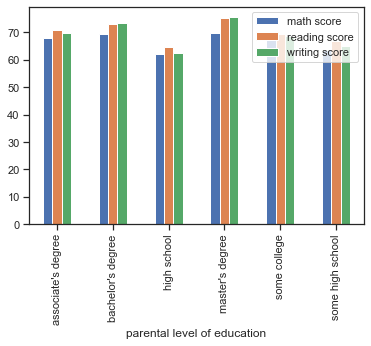

In [78]:
df.groupby(["parental level of education"]).mean().plot.bar()
plt.show()

In [80]:
ple_vs_a = df.groupby(["parental level of education"]).mean()
print(ple_vs_a)

                             math score  reading score  writing score
parental level of education                                          
associate's degree            67.882883      70.927928      69.896396
bachelor's degree             69.389831      73.000000      73.381356
high school                   62.137755      64.704082      62.448980
master's degree               69.745763      75.372881      75.677966
some college                  67.128319      69.460177      68.840708
some high school              63.497207      66.938547      64.888268


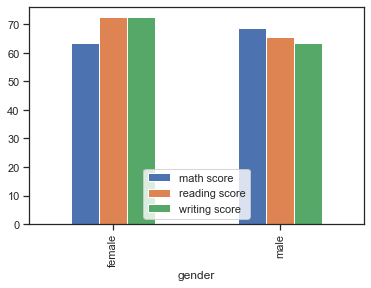

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


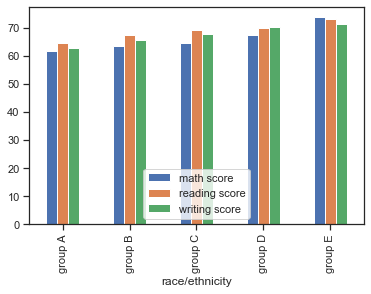

                math score  reading score  writing score
race/ethnicity                                          
group A          61.629213      64.674157      62.674157
group B          63.452632      67.352632      65.600000
group C          64.463950      69.103448      67.827586
group D          67.362595      70.030534      70.145038
group E          73.821429      73.028571      71.407143


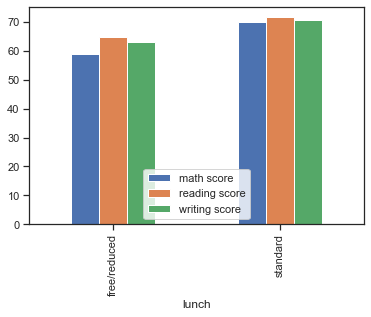

              math score  reading score  writing score
lunch                                                 
free/reduced   58.921127      64.653521      63.022535
standard       70.034109      71.654264      70.823256


In [85]:
df.groupby(["gender"]).mean().plot.bar()
plt.show()
ple_vs_c = df.groupby(["gender"]).mean()
print(ple_vs_c)
df.groupby(["race/ethnicity"]).mean().plot.bar()
plt.show()
ple_vs_d = df.groupby(["race/ethnicity"]).mean()
print(ple_vs_d)
df.groupby(["lunch"]).mean().plot.bar()
plt.show()
ple_vs_e = df.groupby(["lunch"]).mean()
print(ple_vs_e)

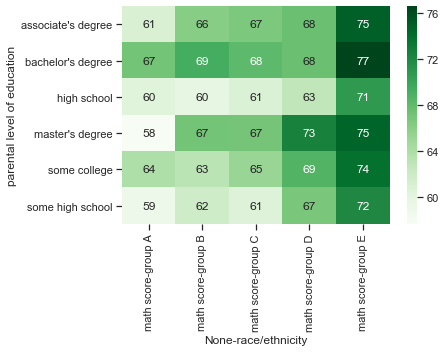

In [83]:
pivot = pd.pivot_table(data = df, index = ["parental level of education"], columns = ["race/ethnicity"], aggfunc = {'math score' : np.mean})
hm = sns.heatmap(data = pivot, annot = True, cmap = "Greens")
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

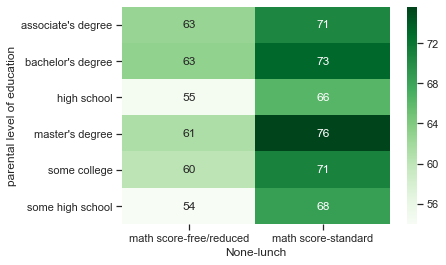

In [86]:
pivot = pd.pivot_table(data = df, index = ["parental level of education"], columns = ["lunch"], aggfunc = {'math score' : np.mean})
hm = sns.heatmap(data = pivot, annot = True, cmap = "Greens")
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

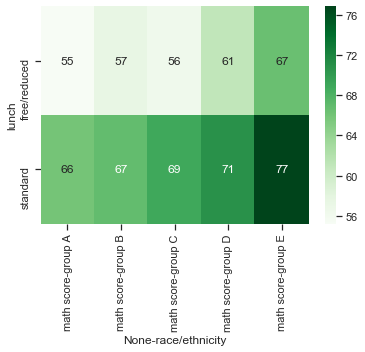

In [87]:
pivot = pd.pivot_table(data = df, index = ["lunch"], columns = ["race/ethnicity"], aggfunc = {'math score' : np.mean})
hm = sns.heatmap(data = pivot, annot = True, cmap = "Greens")
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

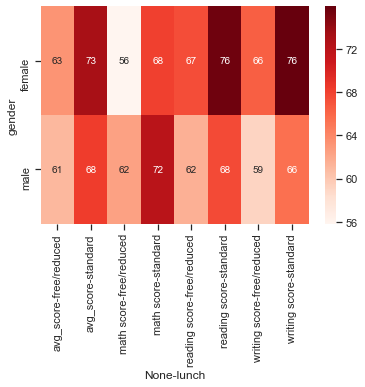

In [144]:
pivot = pd.pivot_table(data = df, index = ["gender"], columns = ["lunch"])
hm = sns.heatmap(data = pivot, annot = True, cmap = "Reds")
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

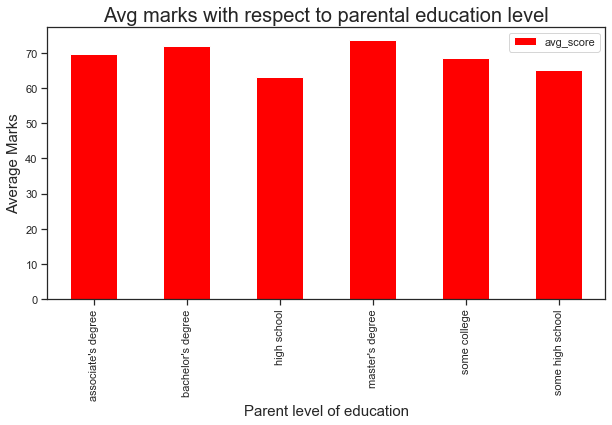

In [113]:
'''1 Hypothesis test of average score by gender
By observing the above graph we can make a hypothesis as below:

Ho (null hypothesis) = There is no difference in math scores between genders.

H1 (alternative hypothesis) = Differences in math scores between genders exist.
'''
'''2 Hypothesis test of preparation course by gender
Ho = There is no difference in listening scores between genders

H1 = Differences in listening scores between genders exist.'''

'''3 Hypothesis test of average  score by parents
Ho = There is no difference in average  score between  parental education level.

H1 = Differences in average  scores between parental education  exist.'''

#3 Draw a bar chart to visualize the relation between parental education level and su
p_avg_score.plot(x="parental level of education",y=["avg_score"],kind="bar",color=['red'],figsize=(10,5))
plt.xlabel("Parent level of education",size=15)
plt.ylabel("Average Marks",size=15)
plt.title("Avg marks with respect to parental education level",size=20)
plt.show()

In [114]:
#Get the average score with respect to the parental level of education
p_avg_score=df.groupby(["parental level of education"])["avg_score"].mean()
p_avg_score=p_avg_score.reset_index()
p_avg_score

,parental level of education,avg_score
0,associate's degree,69.569069
1,bachelor's degree,71.923729
2,high school,63.096939
3,master's degree,73.598870
4,some college,68.476401
5,some high school,65.108007


In [141]:
# 1
df_m = df[df['gender']=='male']
df_f = df[df['gender']=='female']

In [142]:
scipy.stats.ttest_ind(df_m['avg_score'], df_f['avg_score'], equal_var=False)

Ttest_indResult(statistic=-4.17888598340718, pvalue=3.1861975638752864e-05)

In [138]:
#p value is lesser than 0.05,
#so we accept the alternative hypothesis H1 Therefore, men are better at math than women.

#Relation between the student's score and their completion status of test preparation score

df.groupby(["test preparation course"]).mean().style.background_gradient(cmap = "OrRd")
plt.show()
ple_vs_g = df.groupby(["test preparation course"]).mean().style.background_gradient(cmap = "OrRd")
print(ple_vs_g)